In [1]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


In [2]:
# Load data 
# preprocess 
# numerical 
# catregorical 
# apply ml algorithms

In [3]:
crop = pd.read_excel('cropyield.xlsx')

In [4]:
categorical_cols = list(crop.select_dtypes(include=['object']).columns)
print(categorical_cols)
CropList = crop['Crop'].unique()
SeasonList = crop['Season'].unique()
StateList = crop['State'].unique()
print(CropList, SeasonList, StateList)  

['Crop', 'Season', 'State']
['Banana' 'Cashewnut' 'Coconut ' 'Cotton' 'Maize' 'Onion' 'Potato' 'Rice'
 'Sugarcane' 'Wheat' 'Oilseeds' 'Barley'] ['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     '] ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']


In [5]:
crop

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Banana,2000,Whole Year,Andhra Pradesh,935.6,4.815337e+06,12753.26,17.630909
1,Cashewnut,2000,Whole Year,Andhra Pradesh,935.6,1.426557e+07,37781.90,0.190625
2,Coconut,2000,Whole Year,Andhra Pradesh,935.6,1.007676e+07,26687.96,9101.813684
3,Cotton,2000,Kharif,Andhra Pradesh,935.6,1.003024e+08,265647.46,1.687727
4,Maize,2000,Kharif,Andhra Pradesh,935.6,4.226650e+07,111941.44,2.564545
...,...,...,...,...,...,...,...,...
5208,Rice,2019,Autumn,West Bengal,1733.4,3.695004e+07,79596.62,2.434286
5209,Rice,2019,Summer,West Bengal,1733.4,2.184396e+08,470555.64,3.464286
5210,Rice,2019,Winter,West Bengal,1733.4,6.877403e+08,1481508.49,2.771364
5211,Sugarcane,2019,Whole Year,West Bengal,1733.4,3.293842e+06,7095.49,81.091500


In [6]:
numerical_cols = list(crop.select_dtypes(include='number').columns)
numerical_cols.remove('Yield')
numerical_cols.remove('Crop_Year')

print(numerical_cols)


['Annual_Rainfall', 'Fertilizer', 'Pesticide']


In [7]:
crop.drop(['Crop_Year'],axis=1,inplace=True)

In [8]:
crop

,Crop,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Banana,Whole Year,Andhra Pradesh,935.6,4.815337e+06,12753.26,17.630909
1,Cashewnut,Whole Year,Andhra Pradesh,935.6,1.426557e+07,37781.90,0.190625
2,Coconut,Whole Year,Andhra Pradesh,935.6,1.007676e+07,26687.96,9101.813684
3,Cotton,Kharif,Andhra Pradesh,935.6,1.003024e+08,265647.46,1.687727
4,Maize,Kharif,Andhra Pradesh,935.6,4.226650e+07,111941.44,2.564545
...,...,...,...,...,...,...,...
5208,Rice,Autumn,West Bengal,1733.4,3.695004e+07,79596.62,2.434286
5209,Rice,Summer,West Bengal,1733.4,2.184396e+08,470555.64,3.464286
5210,Rice,Winter,West Bengal,1733.4,6.877403e+08,1481508.49,2.771364
5211,Sugarcane,Whole Year,West Bengal,1733.4,3.293842e+06,7095.49,81.091500


In [9]:
# Assuming 'crop' is your DataFrame

# Create a DataFrame with only numerical columns
numerical_df = crop[numerical_cols]

# Create a DataFrame with only categorical columns
categorical_df = crop[categorical_cols]

In [10]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a ColumnTransformer
column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'  # Pass through columns not specified
)

# Fit and transform your data
encoded_cat_data = column_transformer.fit_transform(categorical_df)

# Convert the result to a DataFrame for readability
encoded_cat_df = pd.DataFrame(encoded_cat_data.toarray(), columns=column_transformer.get_feature_names_out())

print(encoded_cat_df)

      one_hot_encoder__Crop_Banana  one_hot_encoder__Crop_Barley  \
0                              1.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   
...                            ...                           ...   
5208                           0.0                           0.0   
5209                           0.0                           0.0   
5210                           0.0                           0.0   
5211                           0.0                           0.0   
5212                           0.0                           0.0   

      one_hot_encoder__Crop_Cashewnut  one_hot_encoder__Crop_Coconut   \
0                                 0.0                             0.0   
1                                 1.0

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_data = scaler.fit_transform(numerical_df)

# Create a DataFrame with the scaled numerical data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)


print(scaled_df)


      Annual_Rainfall  Fertilizer  Pesticide
0           -0.651222   -0.325881  -0.304141
1           -0.651222   -0.260587  -0.217343
2           -0.651222   -0.289529  -0.255816
3           -0.651222    0.333861   0.572880
4           -0.651222   -0.067122   0.039837
...               ...         ...        ...
5208         0.292799   -0.103855  -0.072332
5209         0.292799    1.150099   1.283488
5210         0.292799    4.392609   4.789406
5211         0.292799   -0.336394  -0.323761
5212         0.292799   -0.135681  -0.106743

[5213 rows x 3 columns]


In [12]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [13]:
final_df = pd.concat([scaled_df, encoded_cat_df,crop['Yield']], axis=1)

In [14]:
final_df

,Annual_Rainfall,Fertilizer,Pesticide,one_hot_encoder__Crop_Banana,one_hot_encoder__Crop_Barley,one_hot_encoder__Crop_Cashewnut,one_hot_encoder__Crop_Coconut,one_hot_encoder__Crop_Cotton,one_hot_encoder__Crop_Maize,one_hot_encoder__Crop_Oilseeds,...,one_hot_encoder__State_Puducherry,one_hot_encoder__State_Punjab,one_hot_encoder__State_Sikkim,one_hot_encoder__State_Tamil Nadu,one_hot_encoder__State_Telangana,one_hot_encoder__State_Tripura,one_hot_encoder__State_Uttar Pradesh,one_hot_encoder__State_Uttarakhand,one_hot_encoder__State_West Bengal,Yield
0,-0.651222,-0.325881,-0.304141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.630909
1,-0.651222,-0.260587,-0.217343,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190625
2,-0.651222,-0.289529,-0.255816,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9101.813684
3,-0.651222,0.333861,0.572880,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.687727
4,-0.651222,-0.067122,0.039837,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.564545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5208,0.292799,-0.103855,-0.072332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.434286
5209,0.292799,1.150099,1.283488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.464286
5210,0.292799,4.392609,4.789406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.771364
5211,0.292799,-0.336394,-0.323761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.091500


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 3649, number of used features: 50
[LightGBM] [Info] Start training from score 282.217592


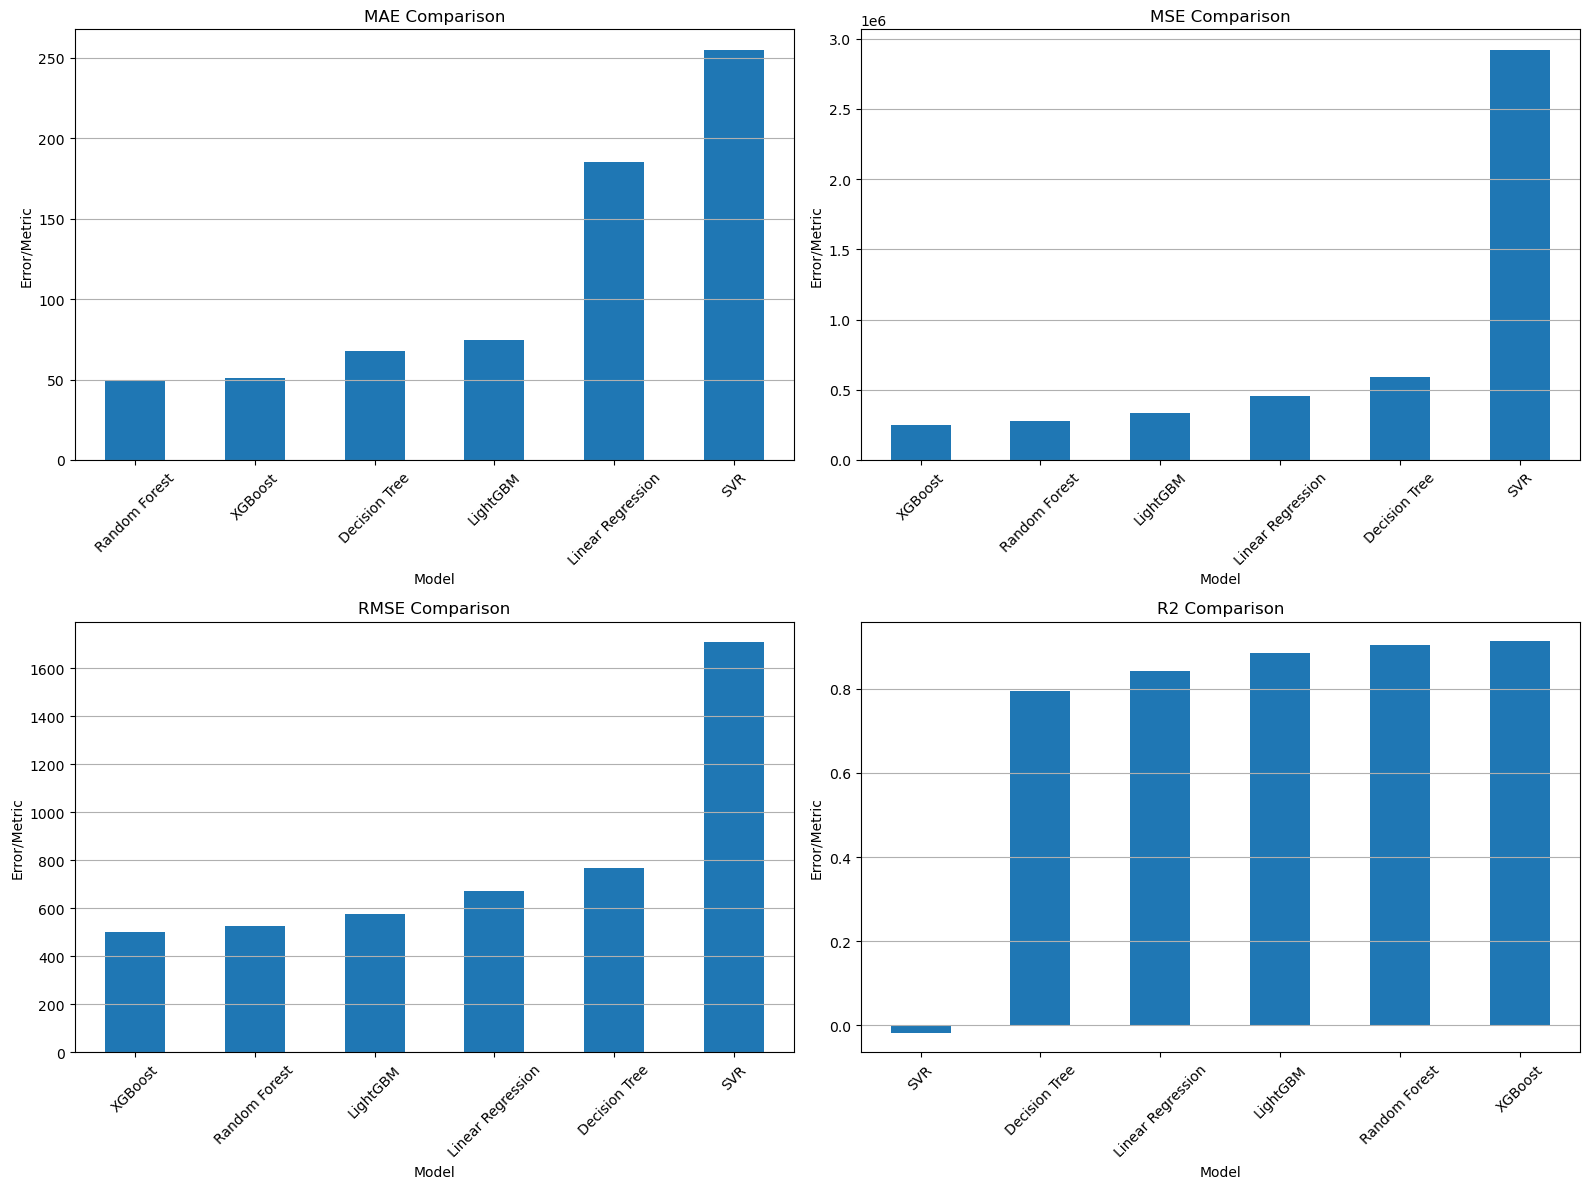

Model evaluation results:
                          MAE           MSE         RMSE        R2
Linear Regression  185.057569  4.522431e+05   672.490238  0.842395
Random Forest       49.195813  2.787856e+05   528.001501  0.902844
SVR                254.905126  2.920286e+06  1708.884471 -0.017707
Decision Tree       67.970861  5.922729e+05   769.592662  0.793595
XGBoost             50.840731  2.522872e+05   502.281999  0.912079
LightGBM            74.374863  3.343941e+05   578.268177  0.883465


In [15]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt

# Assuming df_work contains the dataset for regression problem

# Splitting the data into features and target
X = final_df.drop('Yield', axis=1)
y = final_df['Yield']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    # 'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    # 'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
}

# Adding Stacking Regressor
base_learners = [
    ('rf', RandomForestRegressor()),
    ('svr', SVR()),
    ('knn', KNeighborsRegressor())
]
# models['Stacking'] = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    if( model == models['XGBoost']):
        with open('XGBoost.pkl', 'wb') as f:
            pickle.dump(model, f)
        

# Save the ColumnTransformer into a separate pickle file
        with open('column_transformer.pkl', 'wb') as f:
            pickle.dump(column_transformer, f)
            
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Evaluating each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Converting results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R2']).T

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
for i, (metric, ax) in enumerate(zip(results_df.columns, axes.flatten())):
    sorted_results_df = results_df.sort_values(by=metric, ascending=True)
    sorted_results_df.plot(kind='bar', y=metric, ax=ax, legend=False)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel('Error/Metric')
    ax.set_xlabel('Model')
    ax.set_xticklabels(sorted_results_df.index, rotation=45)
    ax.grid(axis='y')

plt.tight_layout()
plt.savefig('model_performance_comparison_regression.png')
plt.show()
print('Model evaluation results:')
print(results_df)


In [16]:
val_list = ['byImQaO9rdQOv1HvA9PAWrzXcgqgZkChS542cmrRyoE5yfOCpejxaEAJ8gTru7TD', 'Banana', 'Whole Year ', 'Andhra Pradesh', '232', '232', '232']
cat_data = pd.DataFrame({
                'Crop': [val_list[1]],
                'Season': [val_list[2]],
                'State': [val_list[3]],
                })
num_data = pd.DataFrame({
            'Annual_Rainfall': float(val_list[4]),
            'Fertilizer': float(val_list[5]),
            'Pesticide': float(val_list[6]),
            }, index=[0])
updated_num_data = scaler.transform(num_data)
updated_num_data_df = pd.DataFrame(updated_num_data)
updated_cat_data = column_transformer.transform(cat_data)

In [17]:
print((updated_cat_data.toarray()))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
print(type(updated_num_data))

<class 'numpy.ndarray'>


In [19]:
final_array = np.concatenate((updated_num_data, updated_cat_data.toarray()), axis=1)
print(final_array)

[[-1.48377867 -0.35915006 -0.34756358  1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]


In [20]:
predictor_model = pickle.load(open('XGBoost.pkl','rb'))

In [21]:
val = predictor_model.predict(final_array)
print(val)

[23.105394]
